Sentiment Analysis 
==================
presented by: [Diane López] (https://github.com/dianita956) 
April 2, 2025
CEDISH - University of Texas at San Antonio Libraries

### Sentiment Analysis for Academic Research
Sentiment analysis is also widely used in academic research to analyze large volumes of text data, 
such as student feedback, academic publications, and social media interactions related to educational topics. 
It helps in understanding trends, opinions, and the overall sentiment in the academic community.

## Workshop Agenda
1. 10 min check-in- How are you doing?
2. 20-30 min set-up- launching your IDE: Anaconda, Jupyter Notebook, or Google Colab or preferred IDE. 
3. 5-10 min- Introduction to Sentiment Analysis
4. 5 min break/check in
4. 30 min- Hands-on exercise: Analyzing Sentiment in Text Data
5. 5-10 min- Wrap-up and Q&A

### table of contents:
Introduction to Sentiment Analysis
- Sentiment Analysis Techniques
- Sentiment Analysis Tools

Sentiment Analysis in Python

Conclusion

## Introduction to Sentiment Analysis

### Techniques

* **Lexicon-based: Uses predefined word lists associated with sentiments.**

* Machine Learning: Models trained on labeled data (e.g., Naive Bayes, SVM).

* Deep Learning: Uses advanced neural networks like RNNs and CNNs for complex sentiment patterns.

* Hybrid: Combines lexicon-based and ML approaches for better accuracy.

### Tools
1. NLTK: Advanced library with various sentiment analysis tools.
    - Matplotlib or Plotly: For visualization of sentiment scores.
2. Spacy: Advanced NLP library with sentiment analysis capabilities.

    - displaCy: For visualizing dependency trees and named entities. 


### Documentation for which tool can be found at: 
* NLTK: https://www.nltk.org/install.html
* Spacy: https://spacy.io/usage

## Sentiment Analysis in Python

First thing first, we need to install the libraries we will be using. Today will be using nltk, spacy, and matplotlib. 

In [1]:
import nltk
import matplotlib.pyplot as plt # plt is the shortname for matplotlib this makes it easier to call in the code 
import re
from deep_translator import GoogleTranslator


## Creating your own sentiment calculator

In [2]:
#building a simple Spanish Lexicon (dictionary) 
#postive words score greater > than 0
#negative words score less < than 0
#neutral words score equal = to 0


positive_words = [
    'bueno', 'mágico', 'paz', 'amistad', 'deseo', 
    'feliz', 'alegría', 'amor', 'hermoso', 'éxito', 
    'satisfacción', 'genial', 'increíble', 'niña', 'pueblo', 
    'bosque', 'criaturas', 'hada', 'regreso', 'naturaleza'
]

negative_words = [
    'triste', 'odio', 'miedo', 'fracaso', 'desastre', 
    'decepción', 'perderse', 'desaparecer', 'nerviosa' 
    ]

neutral_words = [
    'normal', 'regular', 'común', 
    'promedio', 'típico', 'estándar'  
    'niña', 'pueblo', 'bosque', 'criaturas', 
    'hada', 'regreso', 'naturaleza', 'foto'
    ]

#creating a dictionary with the words and their scores
lexicon = {}
for word in positive_words: # the colon indicates that the next block of code should be repeated a number of times. iterate thru the list
    lexicon[word] = 1
for word in negative_words:
    lexicon[word] = -1
for word in neutral_words:
    lexicon[word] = 0 

#checking lexicon dictionary and word score
#print(lexicon)

#creating a function to calculate the sentiment score of a text 
def calculate_sentiment(text):
    #tokenizing the text using regex and lowercasing and find words
    tokens = re.findall(r'\b\w+\b', text.lower())
    #store works and scores in a dictionary
    word_scores = {}
    total_score = 0 

    for word in set(tokens): # set() is a Python built-in function used to create a set object. A set is unorder and part of data types: list, tuples,, and dictionary. it help to remoive dups. 
        if word in lexicon:
            word_scores[word] = lexicon[word] #creating a list to store words and its score
            total_score = total_score + lexicon[word]
            #print(total_score)
    
    for word, score in word_scores.items():
        print(f"{word}:{score}")

    #calculate sentiment score: 1 = positive, -1 = negative, 0 = neutral
    return total_score, word_scores

#example text
with open('SylviaGonzalez_CasaLatina.txt', 'r', encoding='utf-8') as f:
    text = f.read()

#calcuating sentiment score
sentiment_score, word_scores = calculate_sentiment(text)
print(f"Sentiment Score: {sentiment_score}")

éxito:1
bueno:1
satisfacción:1
increíble:1
hermoso:1
foto:0
amor:1
odio:-1
Sentiment Score: 5


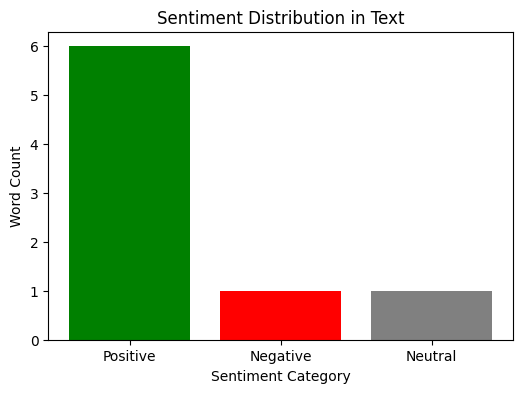

In [3]:

# Counting positive, negative, and neutral words
positive_count = sum(1 for word, score in lexicon.items() if word in word_scores and score > 0)
negative_count = sum(1 for word, score in lexicon.items() if word in word_scores and score < 0)
neutral_count = sum(1 for word, score in lexicon.items() if word in word_scores and score == 0)

# Creating a bar chart
categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.figure(figsize=(6, 4))
plt.bar(categories, counts, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment Category')
plt.ylabel('Word Count')
plt.title('Sentiment Distribution in Text')
plt.show()


niña:1
paz:1
perderse:-1
amor:1
nerviosa:-1
bosque:0
mágico:1
hada:0
deseo:1
pueblo:0
criaturas:0
Sentiment Score: 3


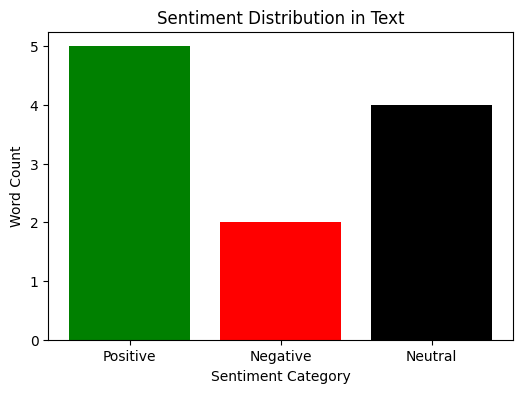

In [4]:
#example text
with open('Sofia.txt', 'r', encoding='utf-8') as f:
    text2 = f.read()

#calcuating sentiment score
sentiment_score, word_scores = calculate_sentiment(text2)
print(f"Sentiment Score: {sentiment_score}")

 # Counting positive, negative, and neutral words
positive_count = sum(1 for word, score in lexicon.items() if word in word_scores and score > 0)
negative_count = sum(1 for word, score in lexicon.items() if word in word_scores and score < 0)
neutral_count = sum(1 for word, score in lexicon.items() if word in word_scores and score == 0)

# Creating a bar chart
categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.figure(figsize=(6, 4))
plt.bar(categories, counts, color=['green', 'red', 'black'])
plt.xlabel('Sentiment Category')
plt.ylabel('Word Count')
plt.title('Sentiment Distribution in Text')
plt.show()

## Vader Multi Language Sentiment Analysis

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [6]:
analyzer = SentimentIntensityAnalyzer()

with open('Sofia.txt', 'r', encoding='utf-8') as f:
    text = f.read()

analyzer.polarity_scores(text)

{'neg': 0.021, 'neu': 0.736, 'pos': 0.243, 'compound': 0.9993}

In [7]:
analyzer = SentimentIntensityAnalyzer()

def remove_timestamps(text):
    # Regular expression pattern to match timestamps [hh:mm:ss.xxx]
    pattern = r"\[\d{2}:\d{2}:\d{2}\.\d{3}\]\s*-\s*"
    # Remove timestamps from the text
    cleaned_text = re.sub(pattern, "", text)
    return cleaned_text

clean_text = remove_timestamps(text)
#print(clean_text) # Print the cleaned text without timestamps

def split_text(text, max_length=5000):
    """Splits text into chunks of max_length characters without breaking sentences."""
    sentences = re.split(r'(?<=[.!?]) +', text)  # Split at sentence boundaries
    chunks = []
    current_chunk = ""

    for sentence in sentences:
        if len(current_chunk) + len(sentence) <= max_length:
            current_chunk += sentence + " "
        else:
            chunks.append(current_chunk.strip())
            current_chunk = sentence + " "

    if current_chunk:
        chunks.append(current_chunk.strip())

    return chunks

text_chunks = split_text(clean_text) 

translator = GoogleTranslator(source='es', target='en')

translated_chunks = [translator.translate(chunk) for chunk in text_chunks]
translated_text = " ".join(translated_chunks)  # Translate Spanish to English

with open('SylviaGonzalez_CasaLatina.txt', 'r', encoding='utf-8') as f:
    text = f.read()

scores = analyzer.polarity_scores(translated_text)
print(scores)
#analyzer.polarity_scores(clean_text)
#analyzer.polarity_scores("Que gracias a nuestro trabajo muchos otros trabajos también sea posible por ejemplo los profesores que se vayan yo tengo clientes que son profesores de la Universidad de Washington que lleguen a su casa y encuentran a sus niños cuidados para las que tienen niños que encuentran sus casas limpias. Entonces eso es parte de lo que yo aportado a Casa Latina pero también lo aportado Gracias a todas esas enseñanzas que me ha dado Casa Latina y el trabajo colectivo que hacemos con todas las mujeres que no soy yo sino Somos todos.")


{'neg': 0.021, 'neu': 0.736, 'pos': 0.243, 'compound': 0.9993}


## NLTK

In [25]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [26]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dianitalopez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dianitalopez/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dianitalopez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
sia = SentimentIntensityAnalyzer()

In [28]:
with open('story1_the_final_algorithm.txt') as f:
    text_s1 = f.read()
scores = sia.polarity_scores(text_s1)
print(f"Sentiment Scores: {scores}")

Sentiment Scores: {'neg': 0.034, 'neu': 0.762, 'pos': 0.205, 'compound': 0.9902}


In [29]:
with open('story2_the_forgotten_letter.txt') as f:
    text_s2 = f.read()
scores = sia.polarity_scores(text_s2)
print(f"Sentiment Scores: {scores}")

Sentiment Scores: {'neg': 0.257, 'neu': 0.632, 'pos': 0.111, 'compound': -0.9865}


In [30]:
with open('story3_the_lucky_coin.txt') as f:
    text_s3 = f.read()
scores = sia.polarity_scores(text_s3)
print(f"Sentiment Scores: {scores}")

Sentiment Scores: {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.9886}


### Sentiment Timeline 

Total sentences: 15
Total sentiment scores: 15
Last sentence detected: The coin gleamed under the moonlight, as if smirking.
1. Oliver had always been fortunate. (Sentiment Score: 0.4404)
2. His charming smile, his optimistic nature—everything about him radiated luck. (Sentiment Score: 0.891)
3. So when he found the old coin on the sidewalk, it didn’t surprise him. (Sentiment Score: 0.2732)
4. Fantastic, he muttered, rubbing it between his fingers. (Sentiment Score: 0.5574)
5. That night, everything went perfectly. (Sentiment Score: 0.6369)
6. He won a prize at work, his date with Sophia was amazing, and his favorite restaurant gave him a free dessert just because. (Sentiment Score: 0.9524)
7. Lucky coin, he joked, flipping it in his hand. (Sentiment Score: 0.8074)
8. But the next day, the luck continued—then intensified. (Sentiment Score: 0.6124)
9. The lottery ticket he had bought on a whim? (Sentiment Score: 0.0)
10. A jackpot. (Sentiment Score: 0.0)
11. The job interview he had bar

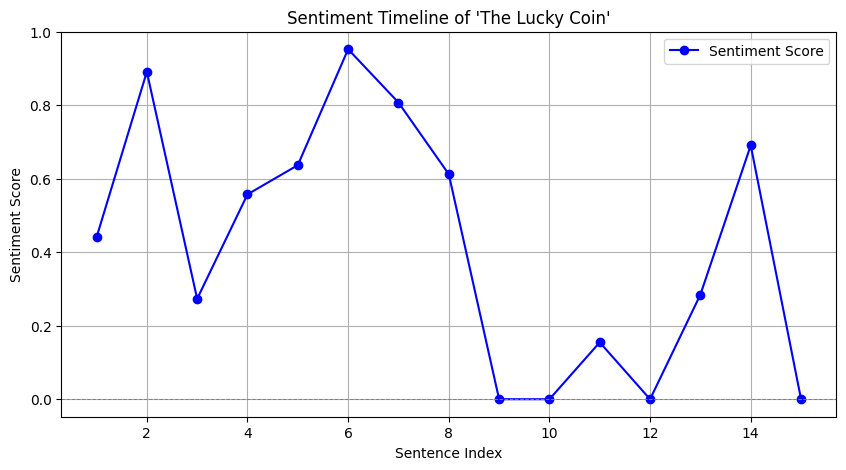

In [31]:
clean_text = re.sub(r'["“”]', '', text_s3)

sentences = nltk.sent_tokenize(clean_text) #split story into sentence

# analyze sentiment for each sentence. the function polarity_scores() that takes a string of text and returns a dictionary of sentiment scores 
sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

print(f"Total sentences: {len(sentences)}")
print(f"Total sentiment scores: {len(sentiment_scores)}")
print(f"Last sentence detected: {sentences[-1]}")

# sentence and its score
for i, (sentence, score) in enumerate(zip(sentences, sentiment_scores), 1):
    print(f"{i}. {sentence} (Sentiment Score: {score})")

# Plot sentiment timeline
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(sentences) + 1), sentiment_scores, marker='o', linestyle='-', color='b', label="Sentiment Score")

# Labels and title
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.7)  # Neutral line
plt.xlabel("Sentence Index")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Timeline of 'The Lucky Coin'")
plt.legend()
plt.grid(True)
plt.show()

## Histogram

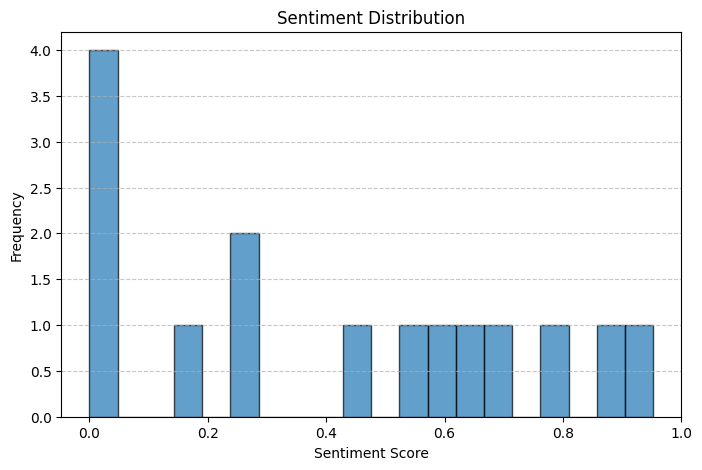

In [32]:
plt.figure(figsize=(8, 5))
plt.hist(sentiment_scores, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


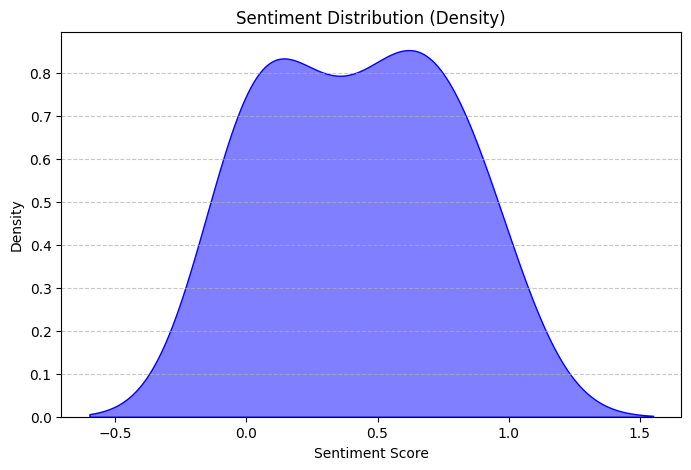

In [34]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(sentiment_scores, fill=True, color="blue", alpha=0.5)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Sentiment Distribution (Density)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


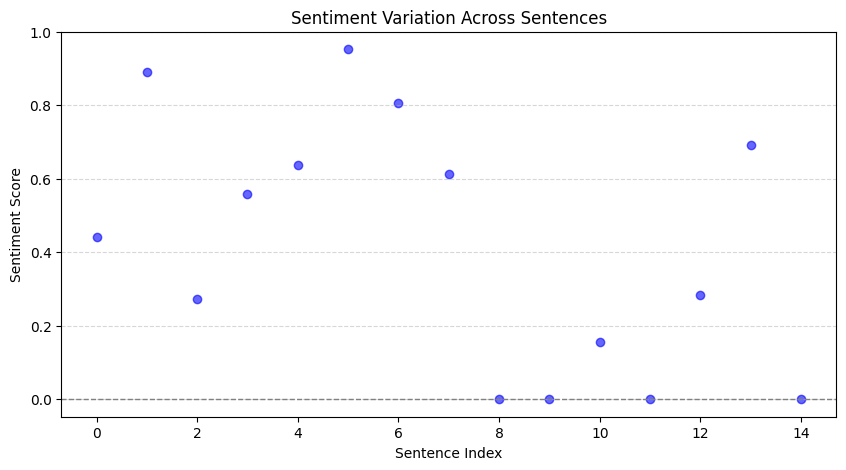

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(sentiment_scores)), sentiment_scores, color='blue', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Neutral line at 0
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Variation Across Sentences')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
